In [9]:
#%pip install numpy matplotlib Pillow opencv-python


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import cv2

print("All imports successful!")

All imports successful!


In [11]:
import cv2
import os
import matplotlib.pyplot as plt

def display_and_save_image(image_path, output_folder="OutputImages"):
    # Load image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Failed to load image from: {image_path}")
        return

    # Create output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Prepare output path
    base_name = os.path.basename(image_path)
    output_path = os.path.join(output_folder, base_name)

    # Save the image
    success = cv2.imwrite(output_path, image)
    if success:
        print(f"Image saved successfully to: {output_path}")
    else:
        print("Failed to save the image.")

    # Display the image
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(8, 6))
    plt.imshow(image_rgb)
    plt.title("Original Image")
    plt.axis("off")
    plt.show()





In [12]:
import os
import matplotlib.pyplot as plt

def detect_red_zones(image_path):
    # Extract base filename (without extension)
    base_name = os.path.splitext(os.path.basename(image_path))[0]

    # Load the image
    image = cv2.imread(image_path)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define lower and upper bounds for red (both ends of HSV spectrum)
    lower_red1 = np.array([0, 50, 50])
    upper_red1 = np.array([10, 255, 255])
    lower_red2 = np.array([160, 50, 50])
    upper_red2 = np.array([180, 255, 255])

    # Create masks for both red ranges and combine them
    mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
    mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
    mask = cv2.bitwise_or(mask1, mask2)

    # Apply the mask to the original image
    red_zone = cv2.bitwise_and(image, image, mask=mask)

    # Save the result to OutputImages folder
    output_folder = "OutputImages"
    os.makedirs(output_folder, exist_ok=True)
    output_filename = os.path.join(output_folder, f"{base_name}_red_zones_detected.jpg")
    cv2.imwrite(output_filename, red_zone)
    print(f"Red zones saved as '{output_filename}'")

    # --- Display original and result images ---
    original_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    output_rgb = cv2.cvtColor(red_zone, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(original_rgb)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(output_rgb)
    plt.title("Red Zones Detected")
    plt.axis("off")

    plt.tight_layout()
    plt.show()


In [13]:
import os

def detect_blue_zones(image_path):
    # Extract base filename without extension
    base_name = os.path.splitext(os.path.basename(image_path))[0]
    
    # Load the image
    image = cv2.imread(image_path)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define the blue spectrum range
    lower_blue = np.array([90, 50, 50])
    upper_blue = np.array([130, 255, 255])

    # Create the mask
    mask = cv2.inRange(hsv, lower_blue, upper_blue)

    # Apply the mask to the original image
    blue_zone = cv2.bitwise_and(image, image, mask=mask)

    # Create output folder if not exists
    output_folder = "OutputImages"
    os.makedirs(output_folder, exist_ok=True)

    # Create dynamic output filename
    output_filename = os.path.join(output_folder, f"{base_name}_blue_zones_detected.jpg")
    cv2.imwrite(output_filename, blue_zone)

    print(f"Blue zones saved as '{output_filename}'")

    # Display original and detected images
    import matplotlib.pyplot as plt
    original_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    output_rgb = cv2.cvtColor(blue_zone, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(original_rgb)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(output_rgb)
    plt.title("Blue Zones Detected")
    plt.axis("off")

    plt.tight_layout()
    plt.show()


In [14]:
import os

def detect_yellow_zones(image_path):
    # Extract base filename without extension
    base_name = os.path.splitext(os.path.basename(image_path))[0]

    # Load the image
    image = cv2.imread(image_path)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define the yellow spectrum range (covering light to deep yellow)
    lower_yellow = np.array([20, 50, 50])    # Lighter yellow shades
    upper_yellow = np.array([40, 255, 255])  # Darker yellow shades

    # Create the mask
    mask = cv2.inRange(hsv, lower_yellow, upper_yellow)

    # Apply the mask to the original image
    yellow_zone = cv2.bitwise_and(image, image, mask=mask)

    # Create output folder if not exists
    output_folder = "OutputImages"
    os.makedirs(output_folder, exist_ok=True)

    # Save the result as a new image with dynamic filename
    output_filename = os.path.join(output_folder, f"{base_name}_yellow_zones_detected.jpg")
    cv2.imwrite(output_filename, yellow_zone)
    print(f"Yellow zones saved as '{output_filename}'")

    # --- Display original and result images ---
    import matplotlib.pyplot as plt
    original_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    output_rgb = cv2.cvtColor(yellow_zone, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(original_rgb)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(output_rgb)
    plt.title("Yellow Zones Detected")
    plt.axis("off")

    plt.tight_layout()
    plt.show()


In [15]:
import os

def detect_green_zones(image_path):
    # Extract base filename without extension
    base_name = os.path.splitext(os.path.basename(image_path))[0]

    # Load the image
    image = cv2.imread(image_path)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define the green spectrum range
    lower_green = np.array([35, 50, 50])    # Light green shades
    upper_green = np.array([85, 255, 255])  # Dark green shades

    # Create the mask
    mask = cv2.inRange(hsv, lower_green, upper_green)

    # Apply the mask to the original image
    green_zone = cv2.bitwise_and(image, image, mask=mask)

    # Create output folder if not exists
    output_folder = "OutputImages"
    os.makedirs(output_folder, exist_ok=True)

    # Save the result as a new image with dynamic filename
    output_filename = os.path.join(output_folder, f"{base_name}_green_zones_detected.jpg")
    cv2.imwrite(output_filename, green_zone)

    print(f"Green zones saved as '{output_filename}'")

    # --- Display original and result images ---
    import matplotlib.pyplot as plt
    original_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    output_rgb = cv2.cvtColor(green_zone, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(original_rgb)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(output_rgb)
    plt.title("Green Zones Detected")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

Image saved successfully to: OutputImages\3.jpg


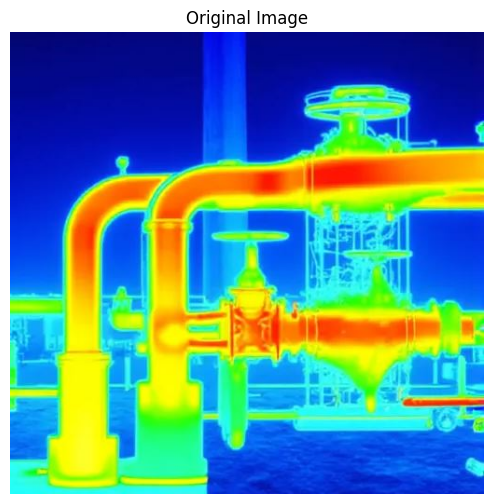

Red zones saved as 'OutputImages\3_red_zones_detected.jpg'


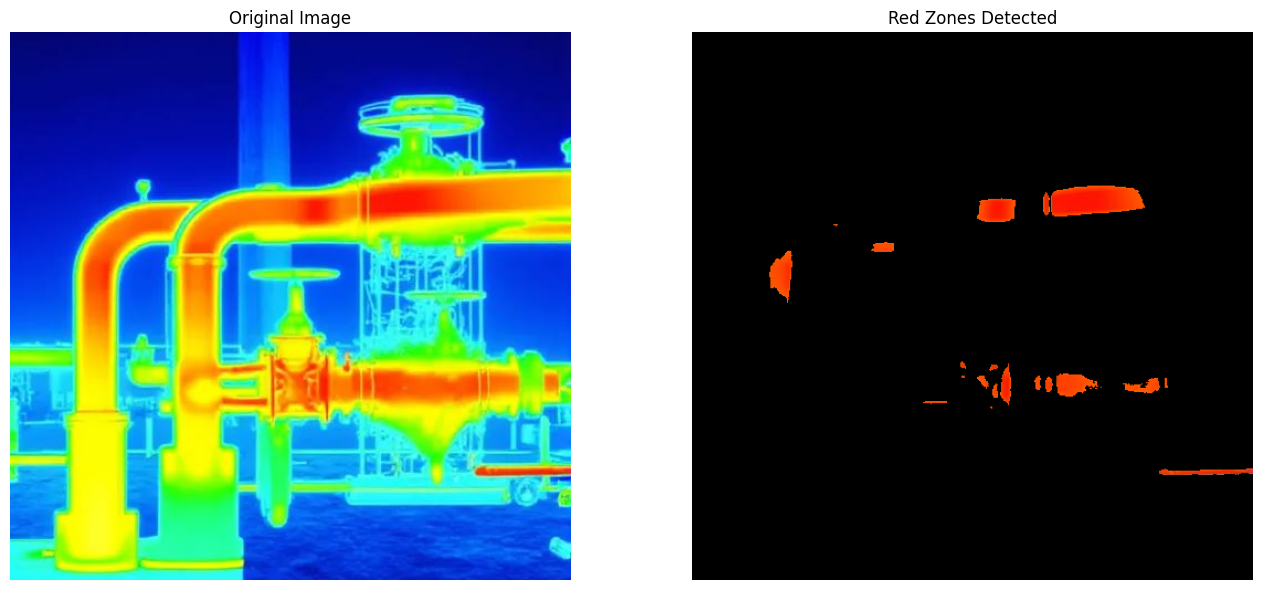

Green zones saved as 'OutputImages\3_green_zones_detected.jpg'


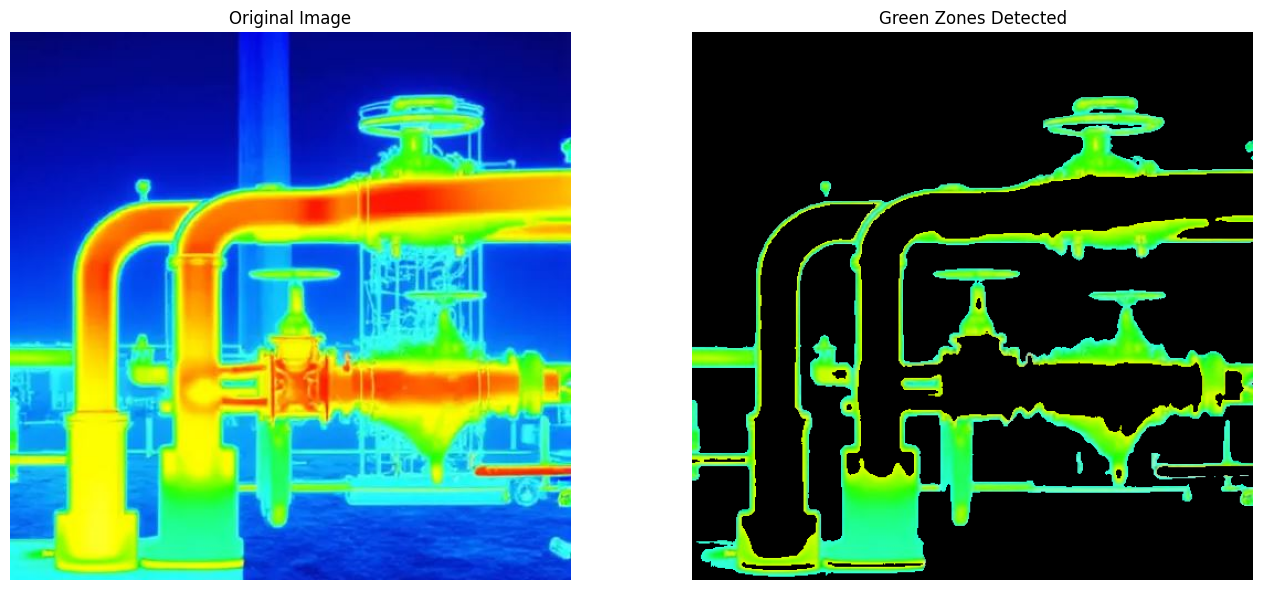

Yellow zones saved as 'OutputImages\3_yellow_zones_detected.jpg'


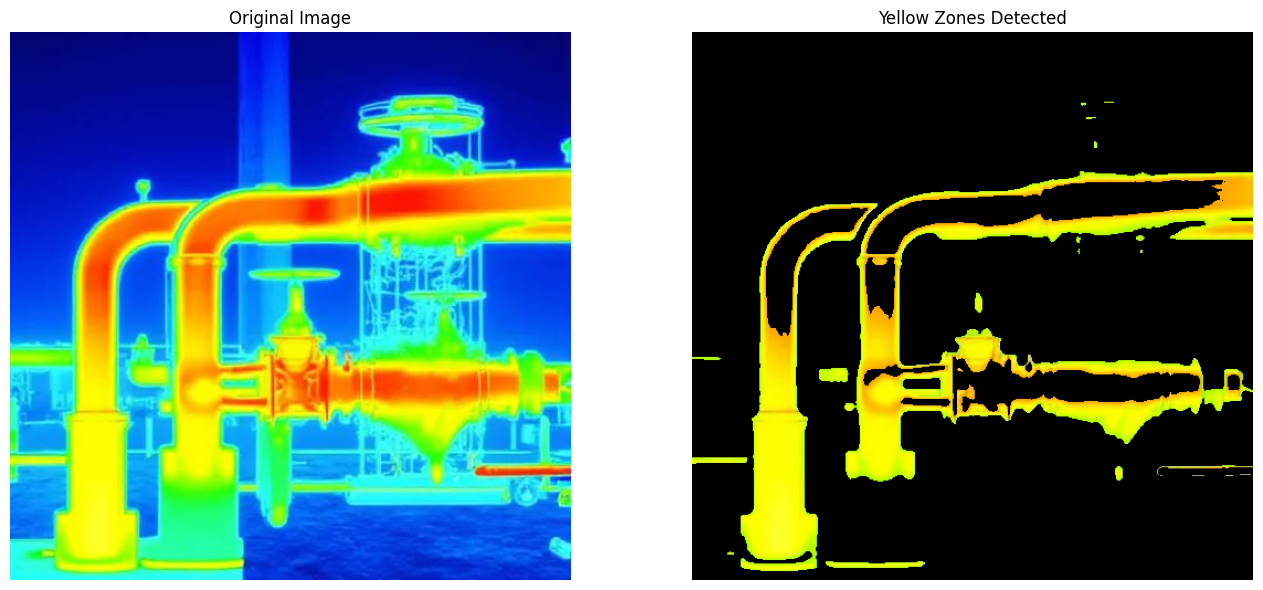

Blue zones saved as 'OutputImages\3_blue_zones_detected.jpg'


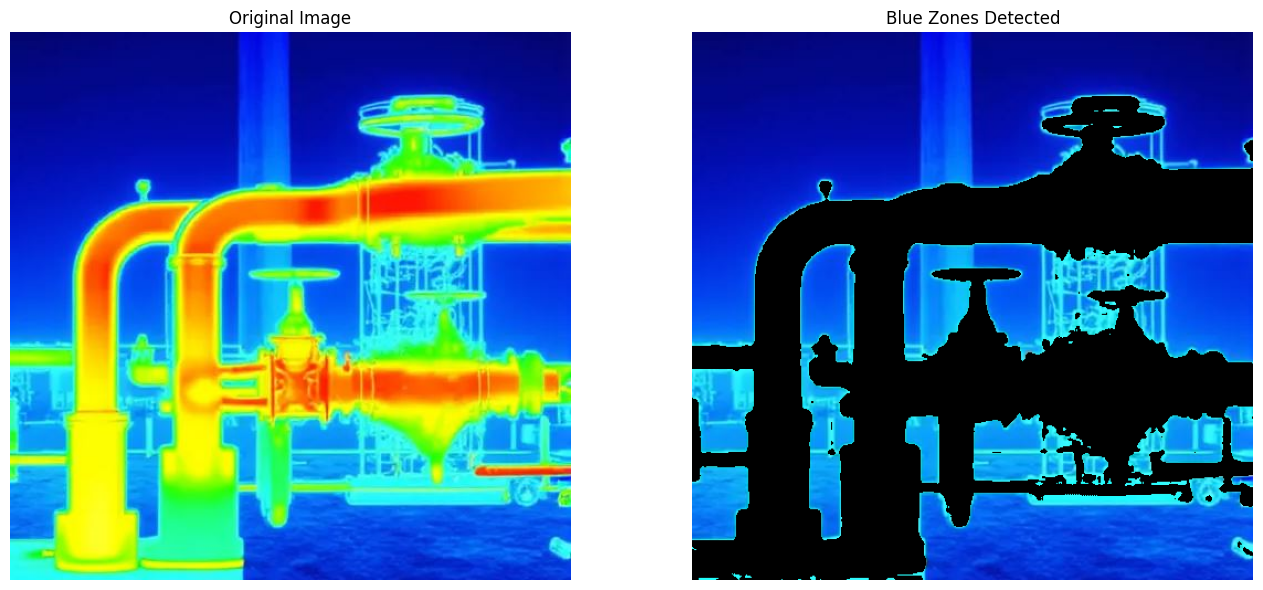

In [16]:
image_path = r"Thermal Image\3.jpg"
display_and_save_image(image_path)


detect_red_zones(image_path)
detect_green_zones(image_path)
detect_yellow_zones(image_path)
detect_blue_zones(image_path)
